# 5 KBO 외국인 투스 스카우팅 최적화

## 5.1 문제 정의

### 5.1.5 분석환경 구축

In [1]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
print(matplotlib.__version__)
print(np.__version__)
print(pd.__version__)
print(sns.__version__)
print(sm.__version__)

3.3.4
1.19.5
1.1.5
0.11.1
0.12.2


In [2]:
!python -V

Python 3.6.4


## 5.2 탐색적 데이터 분석

### 5.2.1 KBO/팬그래프 데이터에 기록된 야구 지표 분석

In [5]:
import pandas as pd

#데이터셋 불러오기 
atKbo_11_18_KboRegSsn = pd.read_csv("./data/chap05/kbo_yearly_foreigners_2011_2018.csv")

atKbo_11_18_MlbTot = pd.read_csv("./data/chap05/fangraphs_foreigners_2011_2018.csv")

atKbo_19_MlbTot = pd.read_csv("./data/chap05/fangraphs_foreigners_2019.csv")

In [6]:
print(atKbo_11_18_KboRegSsn.shape)
print(atKbo_11_18_MlbTot.shape)
print(atKbo_19_MlbTot.shape)

(105, 11)
(205, 19)
(41, 19)


In [7]:
print(atKbo_11_18_KboRegSsn.columns)
print(atKbo_11_18_MlbTot.columns)
print(atKbo_19_MlbTot.columns)

Index(['pitcher_name', 'year', 'team', 'ERA', 'TBF', 'H', 'HR', 'BB', 'HBP',
       'SO', 'year_born'],
      dtype='object')
Index(['pitcher_name', 'year', 'ERA', 'WAR', 'TBF', 'H', 'HR', 'BB', 'HBP',
       'SO', 'WHIP', 'BABIP', 'FIP', 'LD%', 'GB%', 'FB%', 'IFFB%', 'SwStr%',
       'Swing%'],
      dtype='object')
Index(['pitcher_name', 'year', 'ERA', 'WAR', 'TBF', 'H', 'HR', 'BB', 'HBP',
       'SO', 'WHIP', 'BABIP', 'FIP', 'LD%', 'GB%', 'FB%', 'IFFB%', 'SwStr%',
       'Swing%'],
      dtype='object')


              ERA         TBF
count  105.000000  105.000000
mean     4.714286  558.980952
std      1.733072  224.436816
min      2.380000   40.000000
25%      3.740000  349.000000
50%      4.420000  622.000000
75%      5.230000  758.000000
max     15.750000  870.000000


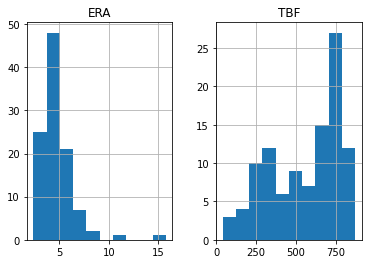

In [8]:
atKbo_11_18_KboRegSsn[['ERA', 'TBF']].hist()
print(atKbo_11_18_KboRegSsn[['ERA', 'TBF']].describe())

              ERA         TBF
count  205.000000  205.000000
mean     5.750585  193.160976
std      3.404285  186.000312
min      0.000000    4.000000
25%      4.050000   57.000000
50%      5.200000  126.000000
75%      6.750000  263.000000
max     27.000000  827.000000


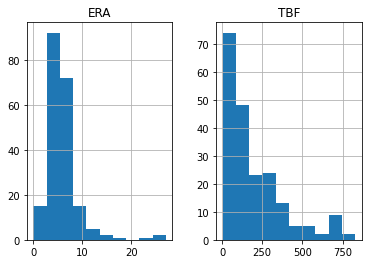

In [9]:
atKbo_11_18_MlbTot[['ERA', 'TBF']].hist()
print(atKbo_11_18_MlbTot[['ERA', 'TBF']].describe())

In [10]:
m_mean = (atKbo_11_18_MlbTot.groupby('pitcher_name')['ERA'].
          mean().
          reset_index().
          rename(columns={'ERA':'MLB_mean'}))
k_mean = (atKbo_11_18_KboRegSsn.groupby('pitcher_name')['ERA'].
          mean().
          reset_index().
          rename(columns={'ERA':'KBO_mean'}))

df = pd.merge(m_mean, k_mean, how = 'inner', on= 'pitcher_name')

df.head()

,pitcher_name,MLB_mean,KBO_mean
0,니퍼트,4.290000,3.6875
1,다이아몬드,10.262500,4.4200
2,듀브론트,5.106667,4.9200
3,레나도,7.306667,6.8000
4,레온,6.050000,11.2500


          MLB_mean  KBO_mean
MLB_mean  1.000000  0.107744
KBO_mean  0.107744  1.000000


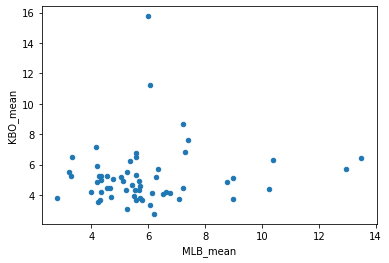

In [11]:
df.plot(kind = 'scatter', x = 'MLB_mean', y = 'KBO_mean')
print(df.corr())

### 5.2.2 스탯캐스트 데이터에 기록된 야구 지표 분석

In [12]:
atKbo_11_18_StatCast = pd.read_csv("data/chap05/baseball_savant_foreigners_2011_2018.csv")

atKbo_19_StatCast = pd.read_csv("data/chap05/baseball_savant_foreigners_2019.csv")

print(atKbo_11_18_StatCast.shape)
print(atKbo_19_StatCast.shape)

(135753, 24)
(21903, 24)


In [13]:
print(atKbo_11_18_StatCast.columns)
print(atKbo_19_StatCast.columns)

Index(['game_date', 'release_speed', 'batter', 'pitcher', 'events',
       'description', 'zone', 'stand', 'p_throws', 'bb_type', 'balls',
       'strikes', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'ax', 'ay', 'az',
       'launch_speed', 'launch_angle', 'release_spin_rate', 'pitch_name',
       'pitcher_name'],
      dtype='object')
Index(['game_date', 'release_speed', 'batter', 'pitcher', 'events',
       'description', 'zone', 'stand', 'p_throws', 'bb_type', 'balls',
       'strikes', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'ax', 'ay', 'az',
       'launch_speed', 'launch_angle', 'release_spin_rate', 'pitch_name',
       'pitcher_name'],
      dtype='object')


In [14]:
atKbo_11_18_StatCast[['events', 'description', 'pitch_name']]

,events,description,pitch_name
0,field_out,hit_into_play,4-Seam Fastball
1,home_run,hit_into_play_score,4-Seam Fastball
2,NaN,foul,4-Seam Fastball
3,NaN,blocked_ball,4-Seam Fastball
4,NaN,ball,4-Seam Fastball
...,...,...,...
135748,NaN,ball,4-Seam Fastball
135749,field_out,hit_into_play,Cutter
135750,NaN,called_strike,Cutter
135751,NaN,ball,4-Seam Fastball


<AxesSubplot:>

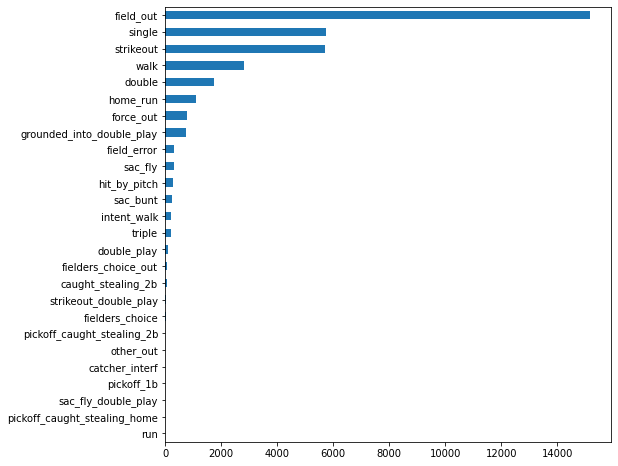

In [15]:
(atKbo_11_18_StatCast['events'].
 value_counts().
 sort_values(ascending = True).
 plot(kind = 'barh', figsize=(8, 8)))

<AxesSubplot:>

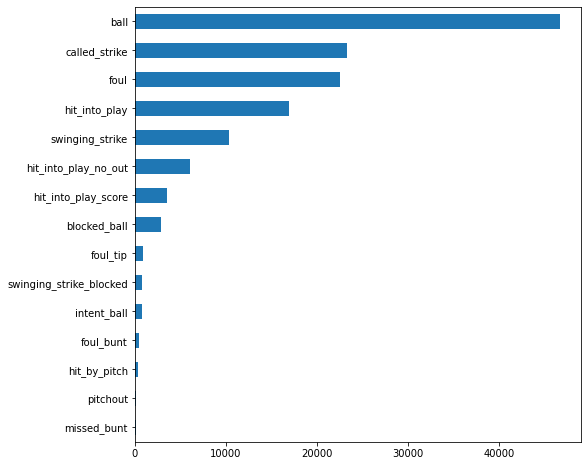

In [16]:
(atKbo_11_18_StatCast['description'].
 value_counts().
 sort_values(ascending = True).
 plot(kind = 'barh', figsize=(8, 8)))

<AxesSubplot:>

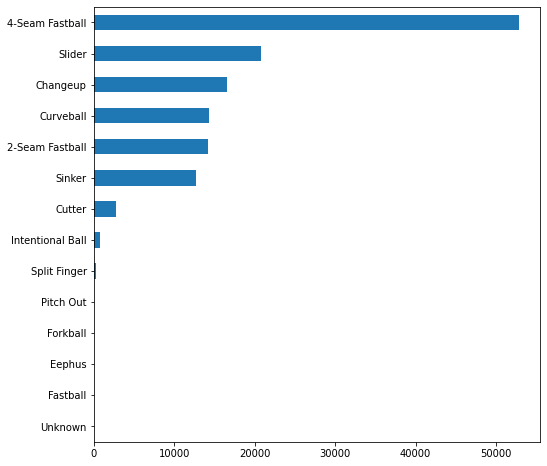

In [17]:
(atKbo_11_18_StatCast['pitch_name'].
 value_counts().
 sort_values(ascending = True).
 plot(kind = 'barh', figsize=(8, 8)))